In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
df = pd.read_csv('data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Grouping the Skills By Month

Select only those job postings that are for Data Scientist and the job country is Germany. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [6]:
df_germ = df[(df['job_title'] == 'Data Scientist') & (df['job_country'] == 'Germany')].copy()

df_germ['job_posted_month_no'] = df_germ['job_posted_date'].dt.month
df_germ
df_germ_explode = df_germ.explode('job_skills')
df_germ_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
439,Data Scientist,Data Scientist,"Stuttgart, Germany",via WGN-TV Jobs,Full-time,False,Germany,2023-02-02 13:19:43,False,False,Germany,NaN,NaN,NaN,DeepScenario GmbH,python,{'programming': ['python']},2
1459,Data Scientist,Data Scientist,"Frankfurt, Germany",via LinkedIn,Full-time,False,Germany,2023-06-01 13:57:27,False,False,Germany,NaN,NaN,NaN,MAM Gruppe,mariadb,"{'cloud': ['azure'], 'databases': ['mariadb']}",6
1459,Data Scientist,Data Scientist,"Frankfurt, Germany",via LinkedIn,Full-time,False,Germany,2023-06-01 13:57:27,False,False,Germany,NaN,NaN,NaN,MAM Gruppe,azure,"{'cloud': ['azure'], 'databases': ['mariadb']}",6
2065,Data Scientist,Data Scientist,"Traunstein, Germany",via BeBee,Full-time,False,Germany,2023-12-01 13:21:02,False,False,Germany,NaN,NaN,NaN,Rosenberger Hochfrequenz- technik GmbH & Co. KG,python,"{'cloud': ['azure', 'databricks'], 'libraries'...",12
2065,Data Scientist,Data Scientist,"Traunstein, Germany",via BeBee,Full-time,False,Germany,2023-12-01 13:21:02,False,False,Germany,NaN,NaN,NaN,Rosenberger Hochfrequenz- technik GmbH & Co. KG,java,"{'cloud': ['azure', 'databricks'], 'libraries'...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783250,Data Scientist,Data Scientist,Germany,via Jobs Trabajo.org,Full-time,False,Germany,2023-01-25 06:21:58,False,False,Germany,NaN,NaN,NaN,Picnic,tableau,"{'analyst_tools': ['tableau'], 'cloud': ['snow...",1
783250,Data Scientist,Data Scientist,Germany,via Jobs Trabajo.org,Full-time,False,Germany,2023-01-25 06:21:58,False,False,Germany,NaN,NaN,NaN,Picnic,git,"{'analyst_tools': ['tableau'], 'cloud': ['snow...",1
783250,Data Scientist,Data Scientist,Germany,via Jobs Trabajo.org,Full-time,False,Germany,2023-01-25 06:21:58,False,False,Germany,NaN,NaN,NaN,Picnic,kubernetes,"{'analyst_tools': ['tableau'], 'cloud': ['snow...",1
783250,Data Scientist,Data Scientist,Germany,via Jobs Trabajo.org,Full-time,False,Germany,2023-01-25 06:21:58,False,False,Germany,NaN,NaN,NaN,Picnic,docker,"{'analyst_tools': ['tableau'], 'cloud': ['snow...",1


### Pivot in Prep for Plotting

In [9]:
# Group by month and job_skills
df_germ_pivot = df_germ_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_germ_pivot.loc['Total'] = df_germ_pivot.sum()
df_germ_pivot

job_skills,airflow,alteryx,angular,assembly,atlassian,aws,azure,bash,bigquery,c,...,tensorflow,terraform,typescript,ubuntu,unity,unix,vba,watson,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,1,0,0,0,18,18,0,2,0,...,14,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,12,11,0,0,1,...,12,0,0,0,0,0,0,0,0,0
3,2,0,0,1,1,11,14,0,0,0,...,10,0,0,0,1,0,0,0,0,0
4,1,2,0,0,0,8,14,0,5,1,...,4,0,0,0,0,0,1,0,0,0
5,4,0,0,0,0,4,4,0,1,0,...,8,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,6,3,0,0,0,...,9,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,7,5,0,0,0,...,2,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,1,6,1,0,1,...,5,0,0,0,0,0,1,0,0,1
9,3,1,1,0,0,10,11,0,1,2,...,9,1,2,0,0,0,1,1,0,1


In [12]:
df_germ_pivot.loc['Total'].sort_values(ascending=False)

job_skills
python         573
sql            285
r              220
azure          128
pandas         122
              ... 
sheets           1
firestore        1
qt               1
dplyr            1
objective-c      1
Name: Total, Length: 112, dtype: int64

In [13]:
df_germ_pivot.loc['Total'].sort_values(ascending=False).index

Index(['python', 'sql', 'r', 'azure', 'pandas', 'tensorflow', 'aws',
       'scikit-learn', 'pytorch', 'spark',
       ...
       'rshiny', 'assembly', 'swift', 'spring', 'mariadb', 'sheets',
       'firestore', 'qt', 'dplyr', 'objective-c'],
      dtype='object', name='job_skills', length=112)

In [15]:
df_germ_pivot = df_germ_pivot[df_germ_pivot.loc['Total'].sort_values(ascending=False).index]
df_germ_pivot

job_skills,python,sql,r,azure,pandas,tensorflow,aws,scikit-learn,pytorch,spark,...,rshiny,assembly,swift,spring,mariadb,sheets,firestore,qt,dplyr,objective-c
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,65,34,22,18,19,14,18,13,9,12,...,0,0,0,0,0,0,0,0,0,0
2,55,25,16,11,13,12,12,10,9,9,...,0,0,0,0,0,0,0,0,0,0
3,51,24,18,14,13,10,11,11,7,7,...,0,1,0,0,0,0,0,0,1,0
4,45,29,22,14,10,4,8,7,6,8,...,0,0,0,0,0,0,0,0,0,0
5,32,18,9,4,7,8,4,6,8,5,...,0,0,0,0,0,0,0,0,0,0
6,23,5,8,3,11,9,6,6,4,3,...,0,0,0,0,1,0,0,1,0,0
7,27,13,13,5,3,2,7,1,1,2,...,0,0,0,0,0,0,0,0,0,0
8,25,15,7,6,3,5,1,2,4,2,...,0,0,0,0,0,0,0,0,0,0
9,46,21,22,11,7,9,10,7,5,10,...,0,0,0,0,0,1,0,0,0,0


In [16]:
df_germ_pivot = df_germ_pivot.drop('Total')
df_germ_pivot

job_skills,python,sql,r,azure,pandas,tensorflow,aws,scikit-learn,pytorch,spark,...,rshiny,assembly,swift,spring,mariadb,sheets,firestore,qt,dplyr,objective-c
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,65,34,22,18,19,14,18,13,9,12,...,0,0,0,0,0,0,0,0,0,0
2,55,25,16,11,13,12,12,10,9,9,...,0,0,0,0,0,0,0,0,0,0
3,51,24,18,14,13,10,11,11,7,7,...,0,1,0,0,0,0,0,0,1,0
4,45,29,22,14,10,4,8,7,6,8,...,0,0,0,0,0,0,0,0,0,0
5,32,18,9,4,7,8,4,6,8,5,...,0,0,0,0,0,0,0,0,0,0
6,23,5,8,3,11,9,6,6,4,3,...,0,0,0,0,1,0,0,1,0,0
7,27,13,13,5,3,2,7,1,1,2,...,0,0,0,0,0,0,0,0,0,0
8,25,15,7,6,3,5,1,2,4,2,...,0,0,0,0,0,0,0,0,0,0
9,46,21,22,11,7,9,10,7,5,10,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

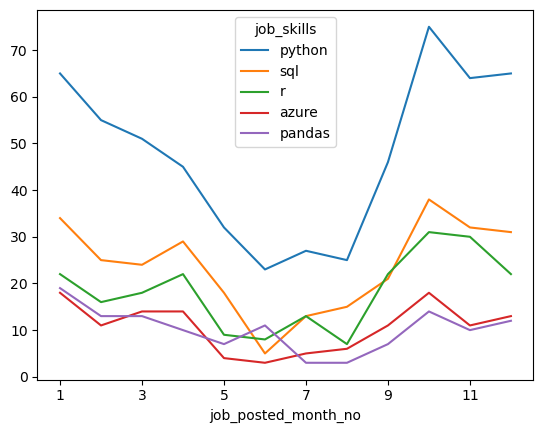

In [32]:
df_germ_pivot.iloc[:,:5].plot()

In [65]:

DA_totals = df_germ.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1      78
2      67
3      62
4      68
5      39
6      26
7      35
8      38
9      87
10    114
11     89
12     93
dtype: int64

In [67]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_germ_percent = df_germ_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_germ_percent = df_germ_percent.reset_index()
df_germ_percent['job_posted_month'] = df_germ_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_germ_percent = df_germ_percent.set_index('job_posted_month')
df_germ_percent = df_germ_percent.drop(columns='job_posted_month_no')

df_germ_percent

job_skills,python,sql,r,azure,pandas,tensorflow,aws,scikit-learn,pytorch,spark,...,rshiny,assembly,swift,spring,mariadb,sheets,firestore,qt,dplyr,objective-c
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,83.333333,43.589744,28.205128,23.076923,24.358974,17.948718,23.076923,16.666667,11.538462,15.384615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,82.089552,37.313433,23.880597,16.417910,19.402985,17.910448,17.910448,14.925373,13.432836,13.432836,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,82.258065,38.709677,29.032258,22.580645,20.967742,16.129032,17.741935,17.741935,11.290323,11.290323,...,0.000000,1.612903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.612903,0.000000
Apr,66.176471,42.647059,32.352941,20.588235,14.705882,5.882353,11.764706,10.294118,8.823529,11.764706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,82.051282,46.153846,23.076923,10.256410,17.948718,20.512821,10.256410,15.384615,20.512821,12.820513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,88.461538,19.230769,30.769231,11.538462,42.307692,34.615385,23.076923,23.076923,15.384615,11.538462,...,0.000000,0.000000,0.000000,0.000000,3.846154,0.000000,0.000000,3.846154,0.000000,0.000000
Jul,77.142857,37.142857,37.142857,14.285714,8.571429,5.714286,20.000000,2.857143,2.857143,5.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,65.789474,39.473684,18.421053,15.789474,7.894737,13.157895,2.631579,5.263158,10.526316,5.263158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,52.873563,24.137931,25.287356,12.643678,8.045977,10.344828,11.494253,8.045977,5.747126,11.494253,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.149425,0.000000,0.000000,0.000000,0.000000


### Plot Monthly Skill Demand
Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month. Also the legend is moved outside of the plot for readability.

C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


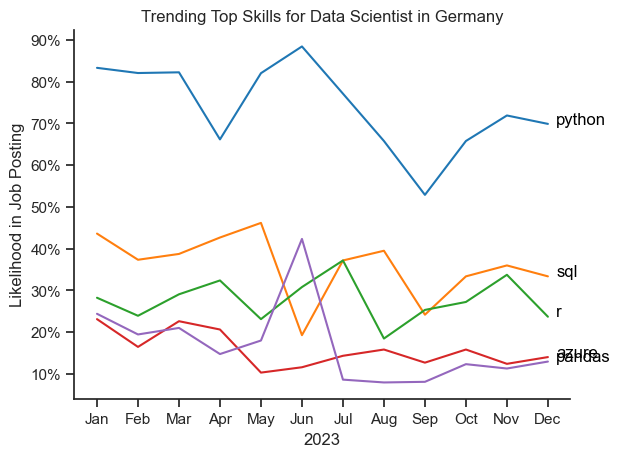

In [108]:
from matplotlib.ticker import PercentFormatter

df_plot = df_germ_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Scientist in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()

### Job Postings Over the course of the Year

<Axes: xlabel='job_posted_month_no'>

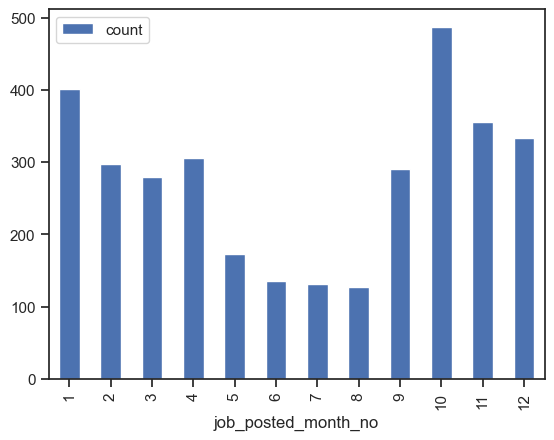

In [98]:
df_germ_explode['job_posted_month_no'].value_counts().sort_index().to_frame().plot(kind='bar')

In [89]:
df_germ_explode['job_posted_month_no'].value_counts().sort_index()
df_plot = df_germ_explode['job_posted_month_no'].value_counts().sort_index().to_frame()
df_plot
# can use df_germ.groupby('job_posted_month_no').size().to_frame().plot()
#df_plot.reset_index(name='skill count')

,count
job_posted_month_no,
1,401
2,298
3,279
4,306
5,173
6,135
7,132
8,127
9,290


In [95]:
df_plot.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='job_posted_month_no')

Text(0, 0.5, 'Job Counts')

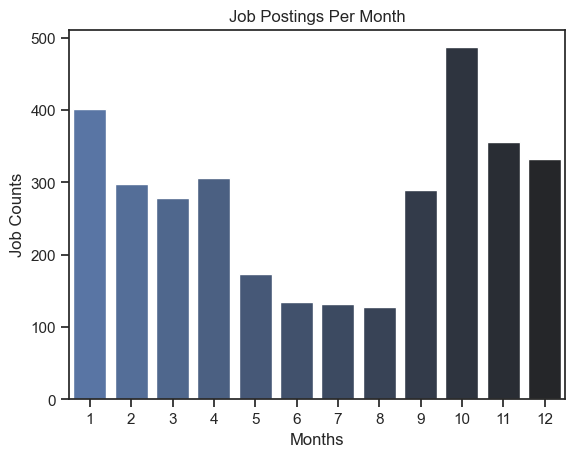

In [106]:
sns.barplot(data=df_plot, x = df_plot.index, y = 'count' ,palette='dark:b_r', )
sns.set_theme(style='ticks')
plt.title('Job Postings Per Month')
plt.xlabel('Months')
plt.ylabel('Job Counts')